In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
num_classes = 10

[4]


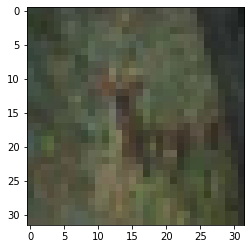

In [4]:
plt.imshow(X_train[10])
print(y_train[10])
plt.ioff()

In [5]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [6]:
import keras
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [8]:
y_train.shape

(50000, 10)

In [9]:
x_test=X_test/255.0
x_train=X_train/255.0

In [24]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Conv2D, AveragePooling2D, Flatten ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.optimizers import adam

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',optimizer="adam", metrics=['accuracy'])

In [30]:
y_train.shape

(50000, 10)

In [39]:
model_log = model.fit(x_train, y_train,batch_size=64,epochs=4,verbose=1)

Epoch 1/4
50000/50000 [==============================] - 248s 5ms/step - loss: 0.5263 - accuracy: 0.8160
Epoch 2/4
50000/50000 [==============================] - 253s 5ms/step - loss: 0.5701 - accuracy: 0.8020
Epoch 3/4
50000/50000 [==============================] - 239s 5ms/step - loss: 0.4997 - accuracy: 0.8259
Epoch 4/4
50000/50000 [==============================] - 237s 5ms/step - loss: 0.5030 - accuracy: 0.8263


In [40]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))

0.6553746531208905


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 15, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 15, 32)        4640      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 30, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 7, 16)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 30, 7, 64)        